# 1.) Preprocess your data into scaled input variables and an output variable


In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv")
df.head()

,Unnamed: 0,Customer Lifetime Value,Income,Number of Policies,Total Claim Amount,Months Since Last Claim,Vehicle Size_Large,Vehicle Size_Medsize,Gender_M,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,EmploymentStatus_Unemployed,Policy Type_Corporate Auto,Policy Type_Personal Auto,Marital Status_Divorced,Marital Status_Married,Marital Status_Single
0,0,2763.519279,56274,1,384.811147,32,0,1,0,1,0,0,0,1,0,0,1,0
1,1,6979.535903,0,8,1131.464935,13,0,1,0,0,0,0,1,0,1,0,0,1
2,2,12887.431650,48767,2,566.472247,18,0,1,0,1,0,0,0,0,1,0,1,0
3,3,7645.861827,0,7,529.881344,18,0,1,1,0,0,0,1,1,0,0,1,0
4,4,2813.692575,43836,1,138.130879,12,0,1,1,1,0,0,0,0,1,0,0,1


In [ ]:
X = df.drop(["Unnamed: 0","Customer Lifetime Value"], axis =1 )
y = df['Customer Lifetime Value']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
clf=MLPRegressor()

In [ ]:
params={
    "hidden_layer_sizes": [(10,),(5,20),(10,100,10,)],
    "activation": ["relu","tanh"],
    "alpha": [0.0001,0.001,0.01]
}

In [ ]:
grid=GridSearchCV(clf,params,cv=5)
grid.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'tanh'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (5, 20), (10, 100, 10)]})

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (5, 20)}
0.04557396686192612


# 3.) Train a model with the optimal solution from GridSearch

In [ ]:
reg=MLPRegressor(**grid.best_params_)
reg.fit(X_train,y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(5, 20))

# 4.) What are the in-sample and out of sample MSEs

In [ ]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [ ]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print('In-sample MSE: %.2f' % train_mse)
print('Out-of-sample MSE: %.2f' % test_mse)

In-sample MSE: 46051862.30
Out-of-sample MSE: 46066475.06


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [ ]:
import keras.models
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2

In [67]:
hidden_layer_sizes = (5,20)
alpha = 0.001
activation = 'relu'

# Build the model
model = Sequential()
model.add(Dense(hidden_layer_sizes[0], input_dim=X_train.shape[1], activation=activation, kernel_regularizer=l2(alpha)))
for layer_size in hidden_layer_sizes[1:]:
    model.add(Dense(layer_size, activation=activation, kernel_regularizer=l2(alpha)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [68]:
model.fit(X_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 112919736.0000 - accuracy: 0.0000e+00
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 112916080.0000 - accuracy: 0.0000e+00
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 112905200.0000 - accuracy: 0.0000e+00
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 112905192.0000 - accuracy: 0.0000e+00
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 112905232.0000 - accuracy: 0.0000e+00
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 112905232.0000 - accuracy: 0.0000e+00
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 112905208.0000 - accuracy: 0.0000e+00
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 112905232.0000 - accuracy: 0.0000e+00
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 112905240.0000 - accu

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [73]:
from tensorflow.keras.utils import plot_model

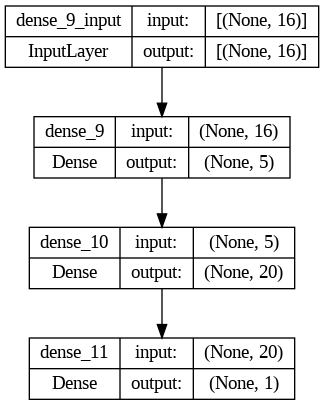

In [74]:
plot_model(model,show_shapes=True)

In [75]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [81]:
from ann_visualizer.visualize import ann_viz 

ann_viz(model, title="Neural Network Architecture")